# DBSCAN

In [ ]:
"""We make a 1D cluster results list which is formed by 
0 = noise
1 = border
2+ = cluster number,

or can we assign negatives?
-1 and -2, for noise and border?
"""

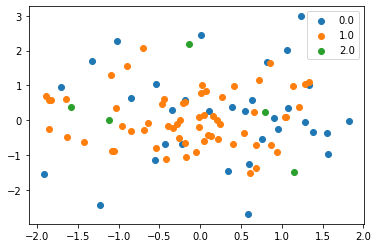

In [1]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt


pointcloudsdummy = np.random.randn(800).reshape((100,8))

def distance2pts(vector1, vector2, p=2):
    #Euclidian p = 2
    #Manhatten p = 1
    num = 0
    for i in range(0,len(vector1)):
        num += abs(vector1[i]-vector2[i]) ** p
    return num ** (1/p)

def check_if_core_point(data, features, eps, minPts, ptIndex):

    temp = np.empty(1)

    for i, item in enumerate(data[:,features]):
        if distance2pts(item, data[ptIndex,features]) <= eps and i != ptIndex:
            temp = np.append(temp, i)
    
    temp = np.delete(temp, 0) # this deletes the first item that is erroneously created when making an 'empty' array

    if len(temp) >= minPts:
        # it's a core points
        return temp, 1
    elif (len(temp) < minPts) and len(temp) > 0:
        # it's a border point
        return temp, -1
    elif len(temp) == 0:
        # it's a noise point
        return temp, -2
    else:
        print("Failed to categorise point")
    
    """ 1 = core, -1 = border, -2 = noise"""


#print(check_if_core_point(pointcloudsdummy, 0, 1, 10, 8, 7))


# loop to go through each point on the lists

def dbscan(data, features, eps, minPts):

    dataConsidered = data[:,features]
    # start cluster C number
    C = 1
    # initialising stacks to maintain
    current_Stack = set()
    unvisited = list(range(0,len(data)))
    clusters = np.zeros(len(data))
    x = 1

    while (len(unvisited) != 0): #this will run until all points  have been assessed

        first_point = True

        random.seed(x)
        current_Stack.add(random.choice(unvisited))
        random.shuffle(unvisited)

        #current_Stack.add(unvisited[x % len(unvisited)])
        x += 1

        while len(current_Stack) != 0: #run until this cluster is  done
            
            #remove current point from stack to keep clean
            curr_index = int(current_Stack.pop())

            #check if core, border or noise
            """ 1 = core, -1 = border, -2 = noise"""
            neighbour_points, point_status = check_if_core_point(data, features, eps, minPts, curr_index)

            #consider only neighbour points not visited already
            neighbour_points = set(neighbour_points) & set(unvisited)

       
            if ((point_status == -1) and first_point and x < 2 * len(unvisited)):
                break
            elif ((point_status == -1) and first_point and x == 2 * len(unvisited)):
                clusters[curr_index] = 0
                unvisited.remove(curr_index)
                for i in  neighbour_points:
                    # print("in loop, this is i: ", i)
                    clusters[int(i)] = 0
                    unvisited.remove(i)
                continue
            x = 1
                        
            unvisited.remove(curr_index) # remove from unvisited list


            if point_status == 1: #is a core point
                first_point = False
                clusters[curr_index] = C #assign cluster number
                current_Stack.update(neighbour_points)
            
            elif point_status == -1: #is border
                clusters[curr_index] = C #assign to cluster
                continue

            elif point_status == -2: #is noise
                clusters[curr_index] = 0
                continue

        if not first_point:
            #increment to next cluster
            C += 1
    
    return clusters, dataConsidered


def plot_dbscan(clustergroup_new, dataConsidered):
    #Getting the Centroids
    u_labels = np.unique(clustergroup_new)

    # #plotting the results:
    for p in u_labels:
        plt.scatter(dataConsidered[clustergroup_new == p , 0] , dataConsidered[clustergroup_new == p , 1] , label = p)
    #plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = "black") # only for centroids
    plt.legend()
    plt.show()



clusters, dataConsidered = dbscan(pointcloudsdummy, [0,1,3,4,5], 1.3, 3)


plot_dbscan(clusters, dataConsidered)

# print(clusters)
# print(dataConsidered)
    


*Find best hyperparameters for DBSCAN

In [43]:
import ClusterComparing as cc

dataload = np.loadtxt('features_norm.csv', delimiter=',')

features_only = dataload[:,1:]

top_combo_hyperparameters = []
top_accuracy = 0
top_clusters = []

epsilon = 0.05
round = 1

for i in range(0,5):
    epsilon += 0.015
    minPts = 12
    for i2 in range(0,5):
        clusters, dataConsidered = dbscan(features_only, [0,1,2,3,4,5], epsilon, minPts)
        percentage = cc.cluster_accuracy(clusters)
        if top_accuracy < percentage:
            top_accuracy = percentage
            top_clusters = clusters
            top_combo_hyperparameters = [epsilon,minPts]
        print("this was round {}. Epsilon: {}. minPts: {}. Accuracy: {}".format(round,epsilon,minPts,percentage))
        minPts += 1
        round += 1
        


print("Done with all clusters")


correct 224
incorrect 276
percentage 0.448
this was round 1. Epsilon: 0.065. minPts: 12. Accuracy: 0.448
correct 214
incorrect 286
percentage 0.428
this was round 2. Epsilon: 0.065. minPts: 13. Accuracy: 0.428
correct 217
incorrect 283
percentage 0.434
this was round 3. Epsilon: 0.065. minPts: 14. Accuracy: 0.434
correct 196
incorrect 304
percentage 0.392
this was round 4. Epsilon: 0.065. minPts: 15. Accuracy: 0.392
correct 199
incorrect 301
percentage 0.398
this was round 5. Epsilon: 0.065. minPts: 16. Accuracy: 0.398
correct 178
incorrect 322
percentage 0.356
this was round 6. Epsilon: 0.08. minPts: 12. Accuracy: 0.356
correct 178
incorrect 322
percentage 0.356
this was round 7. Epsilon: 0.08. minPts: 13. Accuracy: 0.356
correct 184
incorrect 316
percentage 0.368
this was round 8. Epsilon: 0.08. minPts: 14. Accuracy: 0.368
correct 193
incorrect 307
percentage 0.386
this was round 9. Epsilon: 0.08. minPts: 15. Accuracy: 0.386
correct 231
incorrect 269
percentage 0.462
this was round 1

In [44]:
print(top_combo_hyperparameters, "\n", top_accuracy, "\n", top_clusters)

#best so far
# [0.05, 4] 
#  0.484 

# [0.04, 2] 
#  0.528 
# This creates 19 clusters, so is a bit questionable

# [0.065, 10] 
#  0.452 
# 5 + 1 clusters

print(top_clusters.max())

[0.08, 16] 
 0.462 
 [0. 1. 0. 2. 0. 2. 1. 0. 0. 2. 2. 2. 1. 2. 1. 0. 0. 1. 1. 1. 2. 2. 3. 0.
 2. 0. 0. 2. 2. 0. 0. 0. 0. 0. 0. 1. 2. 0. 0. 2. 2. 2. 3. 0. 3. 2. 0. 0.
 2. 2. 2. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 3. 0. 0. 0. 3. 1.
 3. 0. 0. 1. 0. 0. 2. 1. 3. 1. 3. 0. 0. 3. 0. 0. 0. 1. 0. 0. 0. 0. 1. 2.
 3. 0. 0. 0. 2. 2. 2. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1.
 2. 1. 2. 1. 1. 2. 1. 1. 2. 1. 1. 1. 1. 2. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 2. 2. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1.
 1. 1. 1. 1. 2. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.
 1. 1. 1. 1. 1. 1. 1. 2. 3. 0. 1. 1. 0. 1. 3. 1. 0. 0. 0. 3. 1. 0. 0. 0.
 0. 1. 0. 0. 0. 3. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1.
 1. 1. 1. 3. 0. 0. 3. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1.
 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 3. 3. 1. 1. 0. 1. 3. 3. 0. 0. 1.
 0. 0. 0. 3. 1. 1. 1. 0. 0. 1. 1. 1. 2. 2. 2. 2. 2. 2. 0. 2. 2. 3. 2. 2.
 2. 1. 2. 0. 0. 0. 0. 0. 2. 0.

In [33]:
def get_best_features(normalized_object_features):
    feature_combos = [[1, 2, 3],
    [1, 2, 4],
    [1, 2, 5],
    [1, 2, 6],
    [1, 3, 4],
    [1, 3, 5],
    [1, 3, 6],
    [1, 4, 5],
    [1, 4, 6],
    [1, 5, 6],
    [2, 3, 4],
    [2, 3, 5],
    [2, 3, 6],
    [2, 4, 5],
    [2, 4, 6],
    [2, 5, 6],
    [3, 4, 5],
    [3, 4, 6],
    [3, 5, 6],
    [4, 5, 6]
    ]

    top_combo_hyperparameters = []
    top_accuracy = 0
    top_clusters = []
    data_combo_best = []
    all_results = []

    epsilon = 0.035
    round = 1

    for i in range(0,4):
        epsilon += 0.005
        minPts = 5
        for i2 in range(0,3):
            for i3 in feature_combos:
                column_indexes = np.concatenate(([0], i3))
                feature_test = normalized_object_features[:,column_indexes]

                clusters, dataConsidered = dbscan(feature_test, [1,2,3], epsilon, minPts)
                percentage = cc.cluster_accuracy(clusters)
                if top_accuracy < percentage:
                    top_accuracy = percentage
                    top_clusters = clusters
                    top_combo_hyperparameters = [epsilon,minPts]
                    data_combo_best= [i3]
                data_combo_current = [i3]
                print("this was round {}. Epsilon: {}. minPts: {}. Accuracy: {}. Data_combo: {}".format(round,epsilon,minPts,percentage,data_combo_current))
                round += 1
                all_results.append([epsilon, minPts, i3, percentage])
                # print(all_results)
            minPts += 2
            


            # for i in feature_combos:
            #     column_indexes = np.concatenate(([0], i))
            #     feature_test = normalized_object_features[:,column_indexes]

            #     # hc.compare_clusters(feature_test, -4) 

            #     cluster, dataConsidered = dbscan(feature_test, [1,2,3], 0.05, 4)
            #     print('DBSCAN accuracy')
            #     cc.cluster_accuracy(cluster)

            #     # cluster2, centroids, dataConsidered = KMeans.kMeans(feature_test, 5, [1,2,3])
            #     # print('k-means accuracy')
            #     # cc.cluster_accuracy(cluster2)

            #     print('\n\n')
            #     print('===========================')

get_best_features(dataload)

correct 137
incorrect 363
percentage 0.274
this was round 1. Epsilon: 0.04. minPts: 5. Accuracy: 0.274. Data_combo: [[1, 2, 3]]
correct 149
incorrect 351
percentage 0.298
this was round 2. Epsilon: 0.04. minPts: 5. Accuracy: 0.298. Data_combo: [[1, 2, 4]]
correct 148
incorrect 352
percentage 0.296
this was round 3. Epsilon: 0.04. minPts: 5. Accuracy: 0.296. Data_combo: [[1, 2, 5]]
correct 190
incorrect 310
percentage 0.38
this was round 4. Epsilon: 0.04. minPts: 5. Accuracy: 0.38. Data_combo: [[1, 2, 6]]
correct 133
incorrect 367
percentage 0.266
this was round 5. Epsilon: 0.04. minPts: 5. Accuracy: 0.266. Data_combo: [[1, 3, 4]]
correct 130
incorrect 370
percentage 0.26
this was round 6. Epsilon: 0.04. minPts: 5. Accuracy: 0.26. Data_combo: [[1, 3, 5]]
correct 187
incorrect 313
percentage 0.374
this was round 7. Epsilon: 0.04. minPts: 5. Accuracy: 0.374. Data_combo: [[1, 3, 6]]
correct 159
incorrect 341
percentage 0.318
this was round 8. Epsilon: 0.04. minPts: 5. Accuracy: 0.318. Data

In [103]:
print(all_results)

NameError: name 'all_results' is not defined

In [ ]:
print(top_combo_hyperparameters, "\n", top_accuracy, "\n", top_clusters)
print(top_clusters.max())

print(all_results)

# correct 263
# incorrect 237
# percentage 0.526
# this was round 27. Epsilon: 0.04. minPts: 7. Accuracy: 0.526. Data_combo: [[1, 3, 6]]

Make plot of the one below!

In [ ]:
clusters, dataConsidered = dbscan(dataload, [1,3,6], 0.04, 7)
percentage = cc.cluster_accuracy(clusters)

print(clusters.max())
print(clusters)

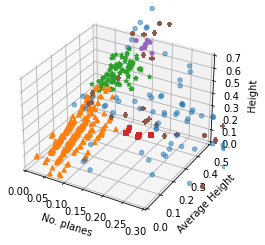

In [102]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.set_zlim(0, 0.7)
ax.set_ylim(0,0.5)
ax.set_xlim(0,0.3)

for m, c, a in [('o',0, 0.5), ('^',1, 1), ('*',2, 1),('s',3, 1),('p',4, 1),('P',5,1)]:
    xs = [dataload[i,6] for i, num_value in enumerate(dataload[:,6]) if int(clusters[i]) == int(c)]
    ys = [dataload[i,3] for i, num_value in enumerate(dataload[:,3]) if int(clusters[i]) == int(c)]
    zs = [dataload[i,1] for i, num_value in enumerate(dataload[:,1]) if int(clusters[i]) == int(c)]
    ax.scatter(xs, ys, zs, marker=m, alpha=a)

ax.set_xlabel('No. planes')
ax.set_ylabel('Average Height')
ax.set_zlabel('Height')

plt.show()


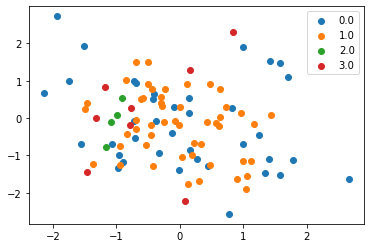

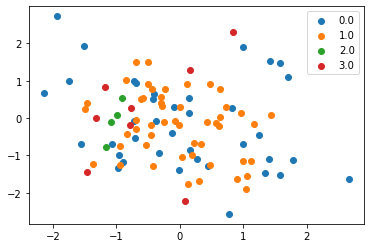

In [81]:
#Plot graphs
def plot_dbscan(clustergroup_new, dataConsidered):
    #Getting the Centroids
    u_labels = np.unique(clustergroup_new)

    # #plotting the results:
    for p in u_labels:
        plt.scatter(dataConsidered[clustergroup_new == p , 0] , dataConsidered[clustergroup_new == p , 1] , label = p)
    #plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = "black") # only for centroids
    plt.legend()
    plt.show()

plot_dbscan(clusters, dataConsidered)